In [1]:
# this assumes that you have already downloaded the 2013 and 2018 data
# named "oes_data_2013.xlsx" and "all_data_M_2018.xlsx"
# and they are in the resources folder

In [38]:
import os
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy
import statsmodels.api as sm

In [3]:
automation = os.path.join("Resources", "automation_likelihood.csv")
data_2013 = os.path.join("Resources", "oes_data_2013.xlsx")
data_2018 = os.path.join("Resources", "all_data_M_2018.xlsx")

In [4]:
automation_df = pd.read_csv(automation, encoding = 'unicode_escape')
automation_df.head()

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180


In [5]:
automation_list = list(automation_df['SOC'])
len(automation_list)

702

In [6]:
data_2013_df = pd.read_excel(data_2013)
data_2013_df.head(5)

,area,area_title,area_type,naics,naics_title,own_code,occ_code,occ_title,group,tot_emp,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,99,U.S.,1,000000,Cross-industry,1235,00-0000,All Occupations,total,132588810,...,16.87,27.34,42.47,18190,22670,35080,56860,88330,,
1,99,U.S.,1,000000,Cross-industry,1235,11-0000,Management Occupations,major,6542950,...,45.96,66.45,#,46340,66660,95600,138220,#,,
2,99,U.S.,1,000000,Cross-industry,1235,11-1000,Top Executives,minor,2278260,...,48.22,75.55,#,44630,66850,100310,157150,#,,
3,99,U.S.,1,000000,Cross-industry,1235,11-1010,Chief Executives,broad,248760,...,82.5,#,#,75030,110610,171610,#,#,,
4,99,U.S.,1,000000,Cross-industry,1235,11-1011,Chief Executives,detail,248760,...,82.5,#,#,75030,110610,171610,#,#,,


In [7]:
columns_2013 = data_2013_df[['occ_code','occ_title','tot_emp','h_median','a_median']].copy()
columns_2013.head()

,occ_code,occ_title,tot_emp,h_median,a_median
0,00-0000,All Occupations,132588810,16.87,35080
1,11-0000,Management Occupations,6542950,45.96,95600
2,11-1000,Top Executives,2278260,48.22,100310
3,11-1010,Chief Executives,248760,82.5,171610
4,11-1011,Chief Executives,248760,82.5,171610


In [8]:
unique_2013 = columns_2013.drop_duplicates(subset='occ_code', keep='first')
len(unique_2013)

1396

In [9]:
final_2013_data = unique_2013[unique_2013['occ_code'].isin(automation_list)]
len(final_2013_data)


689

In [10]:
#final_2013_data.to_csv("../Output/final_2013_data.csv", index=False)

In [11]:
data_2018_df = pd.read_excel(data_2018)
data_2018_df.head(5)

,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,o_group,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,99,U.S.,1,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,...,18.58,30.06,47.31,20690,25740,38640,62510,98410,NaN,NaN
1,99,U.S.,1,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,...,50.11,72.93,#,49260,70880,104240,151700,#,NaN,NaN
2,99,U.S.,1,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,minor,...,49.73,78.81,#,43400,66000,103450,163930,#,NaN,NaN
3,99,U.S.,1,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,broad,...,91.15,#,#,68360,115960,189600,#,#,NaN,NaN
4,99,U.S.,1,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,...,91.15,#,#,68360,115960,189600,#,#,NaN,NaN


In [12]:
columns_2018 = data_2018_df[['occ_code','occ_title','tot_emp','h_median','a_median']].copy()
columns_2018.head()

,occ_code,occ_title,tot_emp,h_median,a_median
0,00-0000,All Occupations,144733270,18.58,38640
1,11-0000,Management Occupations,7616650,50.11,104240
2,11-1000,Top Executives,2535640,49.73,103450
3,11-1010,Chief Executives,195530,91.15,189600
4,11-1011,Chief Executives,195530,91.15,189600


In [13]:
unique_2018 = columns_2018.drop_duplicates(subset='occ_code', keep='first')
len(unique_2018)

1373

In [14]:
final_2018_data = unique_2018[unique_2018['occ_code'].isin(automation_list)]
len(final_2018_data)

669

In [15]:
final_2018_data.to_csv("final_2018_data.csv", index=False)

In [16]:
final_combined = pd.merge(final_2013_data, final_2018_data, left_on='occ_code', right_on='occ_code', suffixes=('_2013', '_2018'))

final_combined.loc[final_combined['h_median_2018'].isin(['*', '#'])]=0

final_combined.loc[final_combined['a_median_2018'].isin(['*', '#'])]=0
final_combined.loc[final_combined['h_median_2013'].isin(['*', '#'])]= 0
final_combined.loc[final_combined['a_median_2013'].isin(['*', '#'])]= 0
final_combined = final_combined[final_combined.loc[:]!=0].dropna()
inflation_2018 = final_combined["a_median_2018"]*0.9221
final_combined['adj_a_median_2018'] = inflation_2018
final_combined.head()
# final_combined.to_csv("final_2018_data.csv", index=False)

percentage_change_a_median = (final_combined['a_median_2013'] - final_combined['adj_a_median_2018'])/final_combined['a_median_2013']
percentage_change_tot_emp = (final_combined['tot_emp_2013'] - final_combined['tot_emp_2018'])/final_combined['tot_emp_2013']
#print(len(percentage_change_a_median))
df1 = pd.DataFrame({ "occ_code": final_combined['occ_code'],
                     "per_change_ma": percentage_change_a_median,
                     "per_change_emp": percentage_change_tot_emp})
df2 = pd.DataFrame({"occ_code": automation_df['SOC'],
                             "occ_title": automation_df['Occupation'],
                             "probability": automation_df['Probability']})
table2_combined = pd.merge(df1, df2, left_on='occ_code', right_on='occ_code')
table2_combined = table2_combined[['occ_code','occ_title','probability','per_change_ma','per_change_emp']]
table2_combined.head()

,occ_code,occ_title,probability,per_change_ma,per_change_emp
0,11-1011,Chief Executives,0.015,-0.0187644,0.213981
1,11-1021,General and Operations Managers,0.160,0.0348693,-0.160141
2,11-2011,Advertising and Promotions Managers,0.039,-0.150464,0.114616
3,11-2021,Marketing Managers,0.014,-0.00494083,-0.38176
4,11-2022,Sales Managers,0.013,-0.0553092,-0.076174


In [17]:
rds_connection_string = "postgres:DarkHoney31$@localhost:5432/ETLProject"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [18]:
# Confirm tables
engine.table_names()

['bls', 'automation', 'BLS']

In [19]:
final_combined.to_sql(name='bls', con=engine, if_exists='append', index=False)
pd.read_sql_query('select * from bls ', con=engine).head()

,occ_code,occ_title_2013,tot_emp_2013,h_median_2013,a_median_2013,occ_title_2018,tot_emp_2018,h_median_2018,a_median_2018,adj_a_median_2018
0,11-1011,Chief Executives,248760,82.50,171610.0,Chief Executives,195530,91.15,189600.0,174830.160
1,11-1021,General and Operations Managers,1973700,46.36,96430.0,General and Operations Managers,2289770,48.52,100930.0,93067.553
2,11-2011,Advertising and Promotions Managers,28530,45.13,93880.0,Advertising and Promotions Managers,25260,56.31,117130.0,108005.573
3,11-2021,Marketing Managers,174010,59.24,123220.0,Marketing Managers,240440,64.56,134290.0,123828.809
4,11-2022,Sales Managers,352220,52.18,108540.0,Sales Managers,379050,59.72,124220.0,114543.262


In [21]:
table2_combined.to_sql(name='automation', con=engine, if_exists='append', index=False)
pd.read_sql_query('select * from automation', con=engine).head()


,id,occ_code,occ_title,probability,per_change_ma,per_change_emp
0,1,11-1011,Chief Executives,0.015,-0.018764,0.213981
1,2,11-1021,General and Operations Managers,0.160,0.034869,-0.160141
2,3,11-2011,Advertising and Promotions Managers,0.039,-0.150464,0.114616
3,4,11-2021,Marketing Managers,0.014,-0.004941,-0.381760
4,5,11-2022,Sales Managers,0.013,-0.055309,-0.076174


In [66]:
Automation_desc=pd.read_sql_query('select occ_title, probability, per_change_ma, per_change_emp from automation order by probability desc limit 10', con=engine)
Automation_desc

,occ_title,probability,per_change_ma,per_change_emp
0,Cargo and Freight Agents,0.99,0.010088,-0.251085
1,Watch Repairers,0.99,-0.037818,0.080986
2,Telemarketers,0.99,-0.029767,0.292109
3,New Accounts Clerks,0.99,0.005388,0.271802
4,Title Examiners; Abstractors; and Searchers,0.99,-0.014676,0.027218
5,Data Entry Keyers,0.99,-0.041937,0.157613
6,Insurance Underwriters,0.99,-0.003062,-0.037821
7,Library Technicians,0.99,-0.003462,0.075953
8,Tax Preparers,0.99,-0.028647,-0.004129
9,Sewers; Hand,0.99,-0.118940,0.061404


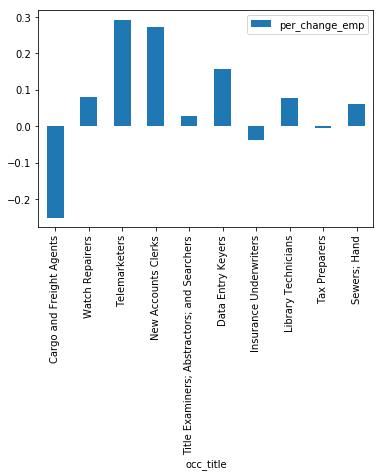

In [67]:
Automation_desc.plot.bar(x='occ_title',y='per_change_emp',rot=90)


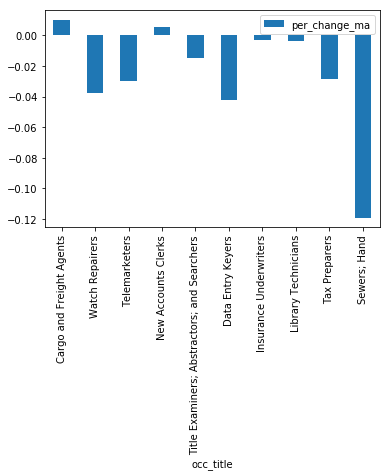

In [68]:
Automation_desc.plot.bar(x='occ_title',y='per_change_ma',rot=90)

In [69]:
Automation_asc=pd.read_sql_query('select occ_title, probability, per_change_ma, per_change_emp from automation order by probability asc limit 10', con=engine)
Automation_asc

,occ_title,probability,per_change_ma,per_change_emp
0,Recreational Therapists,0.0028,-0.022040,-0.010730
1,First-Line Supervisors of Mechanics; Installer...,0.0030,0.003795,-0.100789
2,Emergency Management Directors,0.0030,-0.093066,0.025510
3,Mental Health and Substance Abuse Social Workers,0.0031,-0.009201,-0.061267
4,Audiologists,0.0033,0.016358,-0.151515
5,Healthcare Social Workers,0.0035,-0.019717,-0.185856
6,Occupational Therapists,0.0035,-0.009948,-0.170556
7,Orthotists and Prosthetists,0.0035,-0.012157,-0.060024
8,First-Line Supervisors of Fire Fighting and Pr...,0.0036,-0.004910,-0.104188
9,Lodging Managers,0.0039,-0.051269,-0.197092


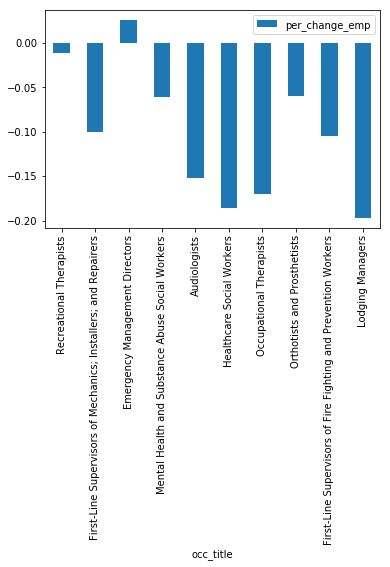

In [70]:
Automation_asc.plot.bar(x='occ_title',y='per_change_emp',rot=90)

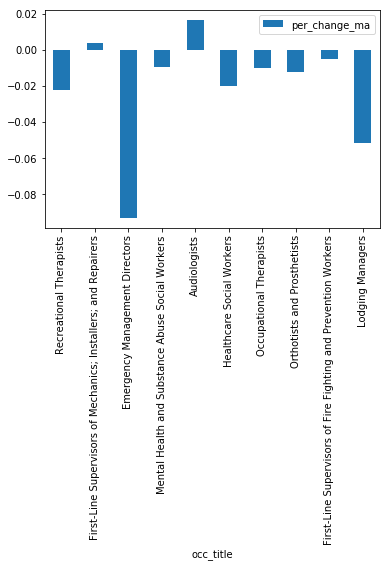

In [71]:
Automation_asc.plot.bar(x='occ_title',y='per_change_ma',rot=90)

In [72]:
prob = list(table2_combined['probability'])
ma = list(table2_combined['per_change_ma'])
emp = list(table2_combined['per_change_emp'])

In [56]:
X = prob
y = ma
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     137.7
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           6.02e-29
Time:                        19:12:07   Log-Likelihood:                 772.32
No. Observations:                 645   AIC:                            -1543.
Df Residuals:                     644   BIC:                            -1538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0511      0.004    -11.733      0.000      -0.060      -0.043
==============================================================================
Omnibus:                      577.207   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27430.570
Skew:                          -3.747   Prob(JB):                         0.00
Kurtosis:                      34.056   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X = prob
z = emp
model = sm.OLS(z, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9880
Date:                Thu, 08 Aug 2019   Prob (F-statistic):              0.321
Time:                        19:12:12   Log-Likelihood:                 83.300
No. Observations:                 645   AIC:                            -164.6
Df Residuals:                     644   BIC:                            -160.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0126      0.013     -0.994      0.321      -0.037       0.012
==============================================================================
Omnibus:                       28.594   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.037
Skew:                          -0.003   Prob(JB):                     1.53e-18
Kurtosis:                       4.747   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""